# Content:
1. [Systems of linear algebraic equations](#1.-Systems-of-linear-algebraic-equations)
2. [Cramer's rule](#2.-Cramer's-rule)
3. [Mathematical stability and numerical stability](#3.-Mathematical-stability-and-numerical-stability)

## 1. Systems of linear algebraic equations

![board%20work%20-3.jpg](../boardwork/board%20work%20-3.jpg)

## 2. Cramer's rule

![board%20work%20-4.jpg](../boardwork/board%20work%20-4.jpg)

Now let's check the result with a bit of coding

In [5]:
import numpy as np

A=np.array([[3,1,-1],[1,2,-1],[1,-1,4]])
b=np.array([2,2,11])

#=== Let's write our own function to find the determinant of a 3x3 matrix
def det(A):
    f1=A[0,0]*A[1,1]*A[2,2]
    f2=A[0,1]*A[1,2]*A[2,0]
    f3=A[0,2]*A[1,0]*A[2,1]
    f4=A[2,0]*A[1,1]*A[0,2]
    f5=A[2,1]*A[1,2]*A[0,0]
    f6=A[2,2]*A[1,0]*A[0,1]
    val=f1+f2+f3-f4-f5-f6
    return val

#=== A1, A2 and A3 are set to A
A1=A.copy()
A2=A.copy()
A3=A.copy()

#=== Then, all rows first column of A1 is set to b, and so on
A1[:,0]=b
A2[:,1]=b
A3[:,2]=b

#=== Cramer's rule
x=np.zeros(3)

x[0]=det(A1)/det(A)
x[1]=det(A2)/det(A)
x[2]=det(A3)/det(A)

print('The solution by applying Cramer\'s rule is: \n', x)

The solution by applying Cramer's rule is: 
 [ 1.  2.  3.]


You can use the determinant function that comes with numpy and check your implementation as follows

In [2]:
print(det(A), np.linalg.det(A))

19 19.0


Let's make our code compact

In [3]:
import numpy as np

A=np.array([[3,1,-1],[1,2,-1],[1,-1,4]])
b=np.array([2,2,11])

x=np.zeros(3)
detA=np.linalg.det(A) # det(A) is calculated once

for i in range(3):
    A1=A.copy()
    A1[:,i]=b
    detA1=np.linalg.det(A1)
    x[i]=detA1/detA

print('The solution by applying Cramer\'s rule is: \n', x)

The solution by applying Cramer's rule is: 
 [ 1.  2.  3.]


While Cramer's rule gives a analytic formula to solve the linear system, for it is not a recommended procedure for practical purposes. One of the main drawbacks of this procedure is the number of floating point operations involved. 

---
* Homework-1: Determine the number of floating point operations encountered when running the previous code.

---

The formula for the  determinant of a 3x3 matrix involves the summation of 6 terms, each term contain 3 factors.  
$$|{\bf A}| = A_{1,1}\times A_{2,2}\times A_{3,3}+ A_{1,2}\times A_{2,3}\times A_{3,1} + A_{1,3}\times A_{2,1}\times A_{3,2} - A_{3,1}\times A_{2,2}\times A_{1,3} - A_{3,2}\times A_{2,3}\times A_{1,1} - A_{3,3}\times A_{2,1}\times A_{1,2}$$
Extending the formula to an arbitrary $N \times N$ matrix requires the application of [Leibniz formula for determinants](https://en.wikipedia.org/wiki/Leibniz_formula_for_determinants). In general, the formula for the determinant of an $N \times N$ matrix will have $N!$ terms. We say that the procedure scales as $N!$ and denote the computational complexity in the big-O notation as ${\mathcal O}(N!)$. The order of number of floating point operations in the formula of determinants is of the order of $N!$. Later we will see that there are more efficient ways for determining the solution of a system of linear equations with their computational complexity scaling as ${\mathcal O}(N^3)$.

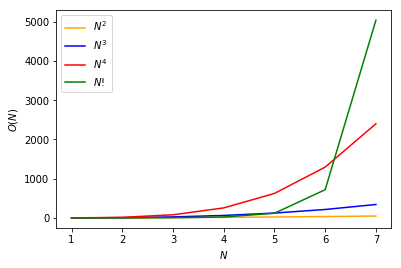

In [4]:
import numpy as np
import matplotlib.pyplot as plt

x=np.arange(1,8)
y=x.copy()

for i in range(x.shape[0]):
    y[i]=np.math.factorial(x[i])

#=== plot
plt.plot(x,x**2,color='orange')
plt.plot(x,x**3,color='blue')
plt.plot(x,x**4,color='red')
plt.plot(x,y,color='green')

plt.xlabel('$N$')
plt.ylabel('$O(N)$')

plt.legend(['$N^2$', '$N^3$','$N^4$','$N$!'], loc ='upper left') 

plt.show()

Before moving to other topics, let's code up the Cramer's rule as a stand-alone function.

In [7]:
def cramers(A,b):
    '''
        Calculates the solution to A x = b, where
            A is an NxN matrix
            b is an vector of N elements
    '''
    import numpy as np
    
    N=A.shape[0]
    x=np.zeros(N)
    
    detA=np.linalg.det(A)
    
    for i in range(3):
        A1=A.copy()
        A1[:,i]=b
        detA1=np.linalg.det(A1)
        
        x[i]=detA1/detA
        
    return x

A=np.array([[3,1,-1],[1,2,-1],[1,-1,4]])
b=np.array([2,2,11])

x=cramers(A,b)

print('The solution by applying Cramer\'s rule is: \n', x)

The solution by applying Cramer's rule is: 
 [ 1.  2.  3.]


In [8]:
print(cramers.__doc__)


        Calculates the solution to A x = b, where
            A is an NxN matrix
            b is an vector of N elements
    


---
* Homework-2: Modify the function 'cramers' so that the code will terminate gracefully when the matrix 'A' is [singular](https://mathworld.wolfram.com/SingularMatrix.html) or when the matrix 'A' and the vector 'b' are not [conformable](https://en.wikipedia.org/wiki/Conformable_matrix).

---

## 3. Mathematical stability and numerical stability 

A procedure (for example, an equation) takes an input and returns an output. 
$$P(i)\rightarrow o$$
If the input is modified, the output is modified appropriately
$$P(i+\Delta i)\rightarrow o + \Delta o$$
Let the relative change in the input is very small, say,  $|\Delta i|/i=\varepsilon$, where $\varepsilon$ is the machine precision.

* Then, if the relative change in the output, $|\Delta o|/o$, is large then the procedure is mathematically unstable (i.e. ill-conditioned).  

* If the relative change in the output is small, then the procedure is mathematically stable (i.e. well-conditioned), and the resulting deviation $|\Delta o|$ is called the unavoidable error.

Unavoidable error can be defined as the difference
$$\Delta o^{\rm Unavoidable}=o^{\rm exact}(i+\varepsilon)-o^{\rm calculated}(i+\varepsilon)$$

An algorithm is a sequence of elementary procedures which tranforms an input to an output through a sequence of intermediate quantitites, $q_i$.
$$A(i)\rightarrow q_1 \rightarrow q_2\rightarrow \ldots\rightarrow q_N\rightarrow o$$
If the error in $i$ and $q_i$ are only due to rounding-off, and the error in $o$ is comparable to the unavoidable error, then the algorithm is numerically stable.

Finding the machine precision with numpy

In [6]:
eps=np.finfo(float).eps
print(eps)

2.22044604925e-16


Examples:
* $c=a\times b$ is well-conditioned
* $c=(a\times b)^{10}$ is ill-conditioned

In [7]:
#=== calculating a*b is a well-conditioned problem
import numpy as np
a=25.0
eps=np.finfo(float).eps

b=1.0
c=a*b

b=1.0+eps  # a small change in the input
d=a*b

print('The outputs are:',c,d, 'and the error is',np.abs(c-d))

The outputs are: 25.0 25.0 and the error is 7.1054273576e-15


In [8]:
#=== calculating (a*b)^10 is a ill-conditioned problem
import numpy as np
a=25.0
eps=np.finfo(float).eps

b=1.0
c=(a*b)**10

b=1.0+eps  # a small change in the input
d=(a*b)**10

print('The outputs are:',c,d, 'and the error is',np.abs(c-d))

The outputs are: 95367431640625.0 9.53674316406e+13 and the error is 0.265625


Another example  
* Subtraction, $c=a-b,~{\rm is~ill-conditioned~when}~a\approx b~{\rm and}~a\ne b\ne0$. 

In [11]:
import numpy as np
x=3e-16
y=np.sin(x)/x
print('When x = ',x,' The value of sin(x)/x is ',y)

When x =  3e-16  The value of sin(x)/x is  1.0


In [13]:
a=1+x
b=1
y=np.sin(x)/(a-b)
print('When a = ',a,' and b = ',b, ' The value of sin(x)/(a-b) is ',y)

When a =  1.0000000000000002  and b =  1  The value of sin(x)/(a-b) is  1.35107988821


> Now that we have some idea about mathematical and numerical stabilities, we can appreciate the fact that calculating a determinant is a numerically unstable process because of subtraction of terms of similar magnitudes.

---
Homework-3: Show that the problem of solving the following linear equation is ill-conditioned for $|a|\approx1$
$$ 
ax+y=1\\
x+ay=0
$$

---

---
Homework-4: Discuss a numerically stable algorithm and a numerically unstable algorithm to solve for $x$ in 
$$x^3-2a^2x-bx+2a\sqrt{a^2+bx}=0$$

---